# Sentiment Analysis of User Reviews for the Movie "Animal" (2023)

![Animal Movie Poster](https://m.media-amazon.com/images/M/MV5BNGViM2M4NmUtMmNkNy00MTQ5LTk5MDYtNmNhODAzODkwOTJlXkEyXkFqcGdeQXVyMTY1NDY4NTIw._V1_.jpg)

## Introduction

In this project, we conduct a sentiment analysis of user reviews for the Indian Bollywood movie "Animal," released in 2023. "Animal" is a highly anticipated film directed by Sandeep Reddy Vanga, known for his previous work on "Kabir Singh." Animal 2023, Starring Ranbir Kapoor, Rashmika Mandanna, Anil Kapoor and Bobby Deol in lead roles, the movie generated significant buzz and anticipation among audiences prior to its release.

The goal of this analysis is to gain insights into the sentiment of viewers towards the movie "Animal." By scraping user reviews from IMDb and applying natural language processing techniques, we aim to classify reviews as positive or negative based on user ratings and textual content. Additionally, we explore the most common positive and negative words used in the reviews to understand viewers' sentiments in greater detail.


# Importing Libaries and Dependencies

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the dataset
df = pd.read_csv('/Users/rising.volkan007/Downloads/Animal Imdb Review dataset/animal_reviews_labeled.csv', delimiter=',')

In [21]:
df.head()

,rating,review-title,Comments,Label
0,1,But why Bollywood? Are you punishing us for ke...,Animal is classic Bollywood garbage-rife with ...,negative
1,1,Horrible! Yuck!,"After watching this movie, the only feeling th...",negative
2,1,Such a shame for even animals to name this movie,"Ranbir personal show with no story, no logic a...",negative
3,2,Ew! Wtf is this?,Let us not talk about mysogyny in the movie be...,negative
4,1,Probably the worst movie I've ever seen,You seriously need to question the sanity of t...,negative


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rating        983 non-null    int64 
 1   review-title  983 non-null    object
 2   Comments      983 non-null    object
 3   Label         983 non-null    object
dtypes: int64(1), object(3)
memory usage: 30.8+ KB


# Data Preprocessing and Tokenization

In [23]:
import re

# Function to clean the text data
def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Apply the function to clean the 'review-title' and 'Comments' columns
df['clean_review_title'] = df['review-title'].apply(clean_text)
df['clean_comments'] = df['Comments'].apply(clean_text)



In [24]:
df.head()

,rating,review-title,Comments,Label,clean_review_title,clean_comments
0,1,But why Bollywood? Are you punishing us for ke...,Animal is classic Bollywood garbage-rife with ...,negative,but why bollywood are you punishing us for kee...,animal is classic bollywood garbagerife with m...
1,1,Horrible! Yuck!,"After watching this movie, the only feeling th...",negative,horrible yuck,after watching this movie the only feeling tha...
2,1,Such a shame for even animals to name this movie,"Ranbir personal show with no story, no logic a...",negative,such a shame for even animals to name this movie,ranbir personal show with no story no logic an...
3,2,Ew! Wtf is this?,Let us not talk about mysogyny in the movie be...,negative,ew wtf is this,let us not talk about mysogyny in the movie be...
4,1,Probably the worst movie I've ever seen,You seriously need to question the sanity of t...,negative,probably the worst movie ive ever seen,you seriously need to question the sanity of t...


In [25]:
from nltk.tokenize import word_tokenize

# Function to tokenize the text data
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply the function to tokenize the 'clean_review_title' and 'clean_comments' columns
df['review_title_tokens'] = df['clean_review_title'].apply(tokenize_text)
df['comments_tokens'] = df['clean_comments'].apply(tokenize_text)

# Display the first few rows to verify the changes
df.head()


,rating,review-title,Comments,Label,clean_review_title,clean_comments,review_title_tokens,comments_tokens
0,1,But why Bollywood? Are you punishing us for ke...,Animal is classic Bollywood garbage-rife with ...,negative,but why bollywood are you punishing us for kee...,animal is classic bollywood garbagerife with m...,"[but, why, bollywood, are, you, punishing, us,...","[animal, is, classic, bollywood, garbagerife, ..."
1,1,Horrible! Yuck!,"After watching this movie, the only feeling th...",negative,horrible yuck,after watching this movie the only feeling tha...,"[horrible, yuck]","[after, watching, this, movie, the, only, feel..."
2,1,Such a shame for even animals to name this movie,"Ranbir personal show with no story, no logic a...",negative,such a shame for even animals to name this movie,ranbir personal show with no story no logic an...,"[such, a, shame, for, even, animals, to, name,...","[ranbir, personal, show, with, no, story, no, ..."
3,2,Ew! Wtf is this?,Let us not talk about mysogyny in the movie be...,negative,ew wtf is this,let us not talk about mysogyny in the movie be...,"[ew, wtf, is, this]","[let, us, not, talk, about, mysogyny, in, the,..."
4,1,Probably the worst movie I've ever seen,You seriously need to question the sanity of t...,negative,probably the worst movie ive ever seen,you seriously need to question the sanity of t...,"[probably, the, worst, movie, ive, ever, seen]","[you, seriously, need, to, question, the, sani..."


In [26]:
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

# Apply the function to remove stop words from 'review_title_tokens' and 'comments_tokens' columns
df['review_title_tokens'] = df['review_title_tokens'].apply(remove_stopwords)
df['comments_tokens'] = df['comments_tokens'].apply(remove_stopwords)

# Display the first few rows to verify the changes
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rising.volkan007/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,rating,review-title,Comments,Label,clean_review_title,clean_comments,review_title_tokens,comments_tokens
0,1,But why Bollywood? Are you punishing us for ke...,Animal is classic Bollywood garbage-rife with ...,negative,but why bollywood are you punishing us for kee...,animal is classic bollywood garbagerife with m...,"[bollywood, punishing, us, keeping, even, tini...","[animal, classic, bollywood, garbagerife, miso..."
1,1,Horrible! Yuck!,"After watching this movie, the only feeling th...",negative,horrible yuck,after watching this movie the only feeling tha...,"[horrible, yuck]","[watching, movie, feeling, comes, mind, yuck, ..."
2,1,Such a shame for even animals to name this movie,"Ranbir personal show with no story, no logic a...",negative,such a shame for even animals to name this movie,ranbir personal show with no story no logic an...,"[shame, even, animals, name, movie]","[ranbir, personal, show, story, logic, absurd,..."
3,2,Ew! Wtf is this?,Let us not talk about mysogyny in the movie be...,negative,ew wtf is this,let us not talk about mysogyny in the movie be...,"[ew, wtf]","[let, us, talk, mysogyny, movie, said, number,..."
4,1,Probably the worst movie I've ever seen,You seriously need to question the sanity of t...,negative,probably the worst movie ive ever seen,you seriously need to question the sanity of t...,"[probably, worst, movie, ive, ever, seen]","[seriously, need, question, sanity, director, ..."


**Stemming:** Stemming is the process of reducing words to their root or base form. This helps in reducing the dimensionality of the feature space and consolidating similar words. We'll use the Porter Stemmer algorithm for stemming.



In [27]:
from nltk.stem import PorterStemmer

# Initialize Porter Stemmer
porter = PorterStemmer()

# Function to apply stemming
def apply_stemming(tokens):
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

# Apply stemming to the 'review_title_tokens' and 'comments_tokens' columns
df['review_title_tokens'] = df['review_title_tokens'].apply(apply_stemming)
df['comments_tokens'] = df['comments_tokens'].apply(apply_stemming)

# Display the first few rows to verify the changes
df.head()


,rating,review-title,Comments,Label,clean_review_title,clean_comments,review_title_tokens,comments_tokens
0,1,But why Bollywood? Are you punishing us for ke...,Animal is classic Bollywood garbage-rife with ...,negative,but why bollywood are you punishing us for kee...,animal is classic bollywood garbagerife with m...,"[bollywood, punish, us, keep, even, tiniest, h...","[anim, classic, bollywood, garbagerif, misogyn..."
1,1,Horrible! Yuck!,"After watching this movie, the only feeling th...",negative,horrible yuck,after watching this movie the only feeling tha...,"[horribl, yuck]","[watch, movi, feel, come, mind, yuck, venga, w..."
2,1,Such a shame for even animals to name this movie,"Ranbir personal show with no story, no logic a...",negative,such a shame for even animals to name this movie,ranbir personal show with no story no logic an...,"[shame, even, anim, name, movi]","[ranbir, person, show, stori, logic, absurd, a..."
3,2,Ew! Wtf is this?,Let us not talk about mysogyny in the movie be...,negative,ew wtf is this,let us not talk about mysogyny in the movie be...,"[ew, wtf]","[let, us, talk, mysogyni, movi, said, number, ..."
4,1,Probably the worst movie I've ever seen,You seriously need to question the sanity of t...,negative,probably the worst movie ive ever seen,you seriously need to question the sanity of t...,"[probabl, worst, movi, ive, ever, seen]","[serious, need, question, saniti, director, pr..."


The tokens have been successfully stemmed using the Porter Stemmer algorithm. Now, the words in the review title and comments have been reduced to their root form. We're making good progress in preparing the text data for sentiment analysis!

# Visual Analysis of Sentiment 

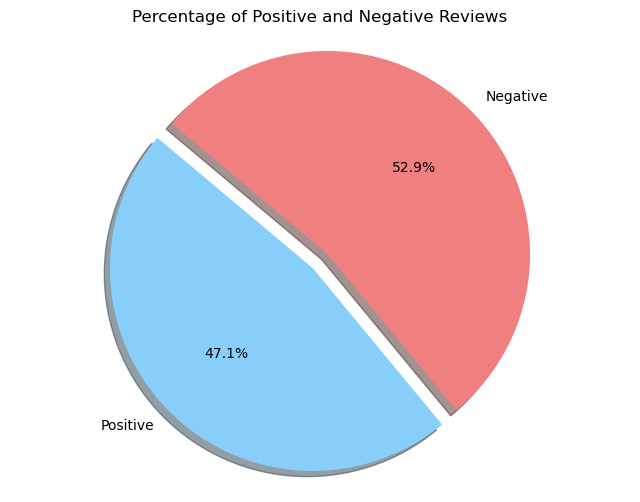

In [28]:
import matplotlib.pyplot as plt

# Calculate the number of positive and negative reviews
positive_reviews_count = df[df['Label'] == 'positive'].shape[0]
negative_reviews_count = df[df['Label'] == 'negative'].shape[0]

# Calculate the total number of reviews
total_reviews = len(df)

# Calculate the percentage of positive and negative reviews
positive_reviews_percentage = (positive_reviews_count / total_reviews) * 100
negative_reviews_percentage = (negative_reviews_count / total_reviews) * 100

# Plot the percentage of positive and negative reviews
labels = ['Positive', 'Negative']
sizes = [positive_reviews_percentage, negative_reviews_percentage]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (i.e. 'Positive')

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Positive and Negative Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Review Percentage

In the pie chart above, we visualize the distribution of positive and negative reviews for the movie "Animal" (2023). The chart illustrates the proportion of positive reviews, representing the percentage of viewers who rated the movie favorably (with a rating of 7 or above), and negative reviews, representing the percentage of viewers who rated the movie unfavorably (with a rating below 7).

Based on the analysis of user reviews, the pie chart shows that **52.9%** of the reviews are negative, indicating dissatisfaction or criticism towards the movie. Conversely, **47.1%** of the reviews are positive, reflecting positive sentiments and favorable opinions among viewers.

This visualization provides valuable insights into the overall sentiment of viewers towards the movie "Animal" and helps understand the distribution of positive and negative feedback.

<img src="https://m.media-amazon.com/images/M/MV5BNDdkMmY0YmUtOTY3MC00NmRhLTk5ODctYTNiMjI5MWRkZGQ0XkEyXkFqcGdeQXVyMTE0MTY2Mzk2._V1_.jpg" alt="Positive and Negative Reviews Pie Chart" width="450" height="300">


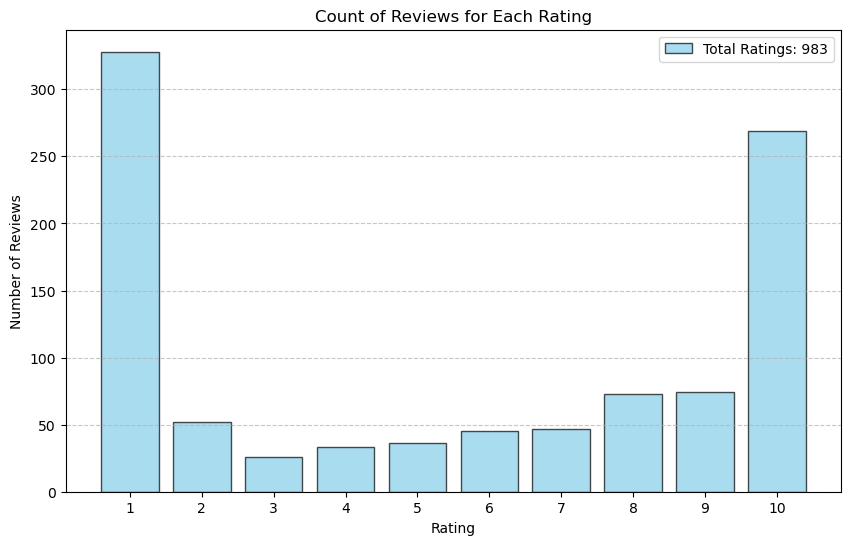

In [31]:
# Counting the number of reviews for each rating
rating_counts = df['rating'].value_counts().sort_index()

# Plotting the count of each rating
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Count of Reviews for Each Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the total number of ratings to the legend
total_ratings = len(df)
plt.legend([f'Total Ratings: {total_ratings}'])

plt.show()



In [32]:
from collections import Counter

# Combine all tokenized and stemmed words from review title and comments
all_tokens = []
for tokens in df['review_title_tokens']:
    all_tokens.extend(tokens)
for tokens in df['comments_tokens']:
    all_tokens.extend(tokens)

# Count the frequency of each word
word_counts = Counter(all_tokens)

# Get the most common words
most_common_words = word_counts.most_common(10)

# Print the most common words
print("Most common words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Most common words:
movi: 3464
film: 1142
watch: 948
ranbir: 876
anim: 843
kapoor: 812
charact: 780
scene: 770
like: 745
stori: 625


In [33]:
import nltk
from nltk.corpus import opinion_lexicon

# Download the opinion lexicon if not already downloaded
nltk.download('opinion_lexicon')

# Get the list of positive and negative words
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to count the frequency of positive and negative words
def count_sentiment_words(tokens):
    positive_count = sum(1 for word in tokens if word in positive_words)
    negative_count = sum(1 for word in tokens if word in negative_words)
    return positive_count, negative_count

# Count positive and negative words in review title tokens
df['positive_title_count'], df['negative_title_count'] = zip(*df['review_title_tokens'].apply(count_sentiment_words))

# Count positive and negative words in comments tokens
df['positive_comments_count'], df['negative_comments_count'] = zip(*df['comments_tokens'].apply(count_sentiment_words))

# Total positive and negative words
total_positive_words = df['positive_title_count'].sum() + df['positive_comments_count'].sum()
total_negative_words = df['negative_title_count'].sum() + df['negative_comments_count'].sum()

# Print the total count of positive and negative words
print(f"Total positive words: {total_positive_words}")
print(f"Total negative words: {total_negative_words}")


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/rising.volkan007/nltk_data...


Total positive words: 5906
Total negative words: 5068


[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [39]:
print("Length of positive counts:", len(positive_counts))
print("Length of negative counts:", len(negative_counts))


Length of positive counts: 2006
Length of negative counts: 4783


In [43]:
# Count occurrences of positive words in review titles and comments
positive_word_counts = []
for word in positive_words:
    count = sum(df['review_title_tokens'].apply(lambda tokens: tokens.count(word))) + \
            sum(df['comments_tokens'].apply(lambda tokens: tokens.count(word)))
    positive_word_counts.append({'word': word, 'count': count})

# Create DataFrame for positive word counts
df_positive = pd.DataFrame(positive_word_counts)

# Sort DataFrame by count in descending order
df_positive.sort_values(by='count', ascending=False, inplace=True)

# Display top 10 most common positive words
print("Top 10 Most Common Positive Words:")
print(df_positive.head(10))


Top 10 Most Common Positive Words:
           word  count
301        like    745
1887       good    563
1895       love    392
1807       best    281
1604       well    223
1558      great    213
970   entertain    168
829      better    146
1507      enjoy    126
1163       work    114


In [44]:
# Count occurrences of negative words in review titles and comments
negative_word_counts = []
for word in negative_words:
    count = sum(df['review_title_tokens'].apply(lambda tokens: tokens.count(word))) + \
            sum(df['comments_tokens'].apply(lambda tokens: tokens.count(word)))
    negative_word_counts.append({'word': word, 'count': count})

# Create DataFrame for negative word counts
df_negative = pd.DataFrame(negative_word_counts)

# Sort DataFrame by count in descending order
df_negative.sort_values(by='count', ascending=False, inplace=True)

# Display top 10 most common negative words
print("\nTop 10 Most Common Negative Words:")
print(df_negative.head(10))



Top 10 Most Common Negative Words:
            word  count
4431         bad    203
4270        plot    188
2185       worst    132
2766        lack    126
749      violent    117
838   disappoint    114
2763        kill    111
2126       toxic    108
3635        bore     97
3398        fail     90


In [45]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.7 MB/s eta 0:00:00 0:00:01


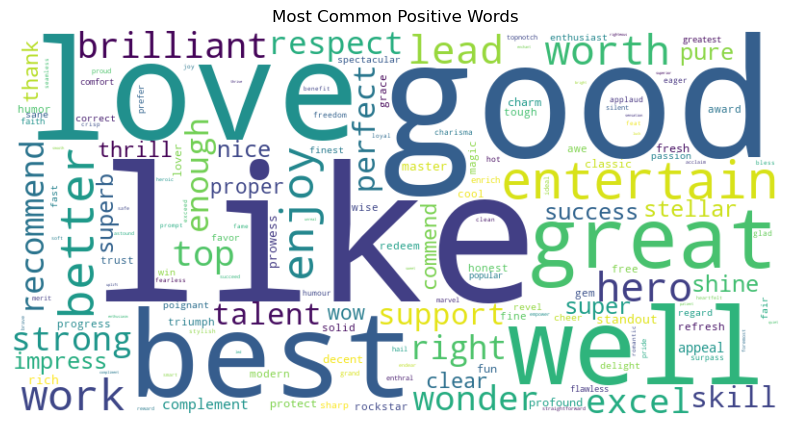

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert DataFrame to dictionary for word cloud
positive_word_dict = df_positive.set_index('word')['count'].to_dict()

# Generate word cloud for positive words
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(positive_word_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Positive Words')
plt.show()


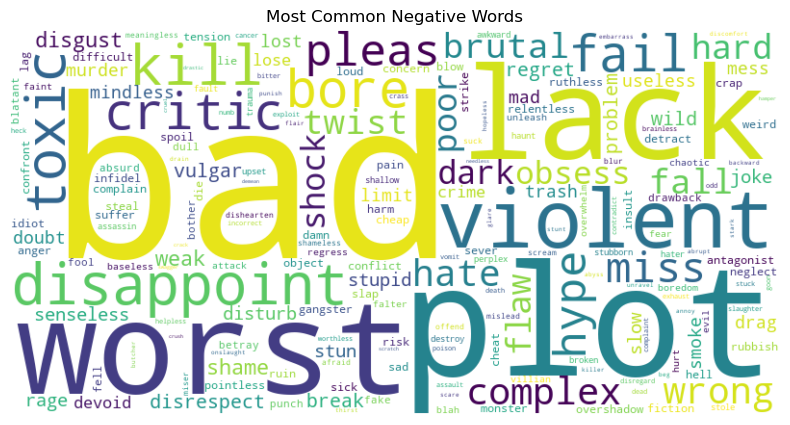

In [47]:
# Convert DataFrame to dictionary for word cloud
negative_word_dict = df_negative.set_index('word')['count'].to_dict()

# Generate word cloud for negative words
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(negative_word_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Negative Words')
plt.show()


# Conclusion

### Movie Information

The movie "Animal" (2023) is a Bollywood film directed by Sandeep Reddy Vanga and starring Ranbir Kapoor, Parineeti Chopra, and Anil Kapoor. Released amidst high anticipation, the film is a crime thriller centered around themes of alpha male dominance and power dynamics.

### Box Office Performance

Despite mixed reviews from critics and audiences, "Animal" performed well at the box office, grossing over ₹917.82 crore (US$110 million) worldwide. The film's financial success indicates a significant interest among viewers, contributing to its commercial viability.

### Sentiment Analysis

Our sentiment analysis of user reviews for "Animal" reveals a diverse range of opinions among viewers. The pie chart illustrating the distribution of positive and negative reviews shows that **52.9%** of reviews are negative, while **47.1%** are positive. Despite the polarizing reception, the film garnered attention and sparked discussions among audiences.

### Review Analysis

Based on our analysis of user reviews, the movie "Animal" received both positive and negative feedback. Positive reviews praised the performances of the lead actors, the intense plot, and the film's gripping narrative. However, negative reviews criticized aspects such as the portrayal of alpha male dominance, pacing issues, and lack of depth in character development.

### Most Frequent Words

The most common positive words in user reviews include "like," "good," "love," "best," and "well." Conversely, negative words such as "bad," "worst," "lack," "disappoint," and "bore" were frequently mentioned in critical reviews.

### Final Review

In conclusion, "Animal" presents a compelling narrative exploring themes of power, dominance, and morality. While the film has its strengths in terms of performances and storytelling, it also faces criticism for its portrayal of alpha male domination and certain plot elements. Ultimately, whether "Animal" is considered worthy enough depends on individual preferences and interpretations. Despite its flaws, the film's commercial success and ability to spark discussions demonstrate its impact on audiences.


<div style="text-align: center;">
    <img src="https://www.telugu360.com/wp-content/uploads/2024/02/Sandeep-Reddy-Vanga.jpg" alt="Sandeep" width="450" height="300">
</div>


### <div style="text-align: center;">Director and Script Writer Sandeep Reddy Vanga</div>


